## Import packages

In [17]:
import os
import json
import matplotlib.pyplot as plt

## Load embeddings

In [12]:
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [9]:
dir_path = '../../data/embedding/emb2d/data/emb-1'
os.listdir(dir_path)

['model_code-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_512_0.05_0.9_3-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_512_0.05_0.9_11-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_512_0.01_0.9_207-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_512_0.05_0.9_13-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_pretrained-dim=30-model_for_emb_space=base.json',
 'reducer-dim=30-model_for_emb_space=base.sav',
 'emb2d-vgg16_512_0.01_0.9_5-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_512_1.5_0.9_4-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_512_0.5_0.9_121-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_512_0.5_0.9_3-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_pretrained-dim=30-model_for_emb_space=base.json',
 'emb2d-vgg16_512_0.01_0.9_21-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_512_1.5_0.9_69-dim=30-model_for_emb_space=base.json',
 'emb2d-inception_v3_512_1.5_0.9_71-dim=30-model_for_

In [38]:
models = [
    'inception_v3_pretrained',
    'vgg16_pretrained',
    'inception_v3_512_0.5_0.9_3',
    'inception_v3_512_0.5_0.9_11',
    'inception_v3_512_0.5_0.9_121',
    'inception_v3_512_1.5_0.9_4',
    'inception_v3_512_1.5_0.9_69',
    'inception_v3_512_1.5_0.9_71',
    'vgg16_512_0.01_0.9_5',
    'vgg16_512_0.01_0.9_21',
    'vgg16_512_0.01_0.9_207',
    'vgg16_512_0.05_0.9_3',
    'vgg16_512_0.05_0.9_11',
    'vgg16_512_0.05_0.9_13',
]

file_names = [
    f'emb2d-{model}-dim=30-model_for_emb_space=base.json'
    for model in models
]

data = [load_json(os.path.join(dir_path, file_name)) for file_name in file_names]

In [71]:
X_range, Y_range = [1000, -1000], [1000, -1000]
for json_data in data:
    for neuron in json_data:
        x, y = json_data[neuron]
        X_range[0] = min(X_range[0], x)
        X_range[1] = max(X_range[1], x)
        Y_range[0] = min(Y_range[0], y)
        Y_range[1] = max(Y_range[1], y)
        
X_range[0] -= 0.1
X_range[1] += 0.1
Y_range[0] -= 0.1
Y_range[1] += 0.1
X_range, Y_range

([-2.533461904525757, 11.258117294311523],
 [-0.7330645680427551, 9.97789249420166])

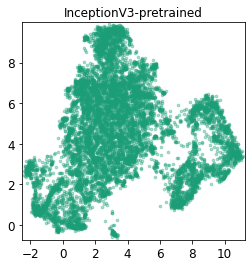

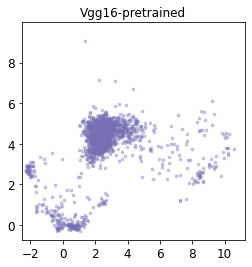

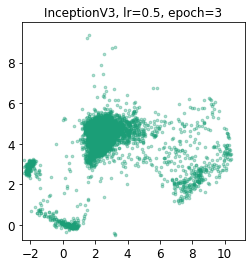

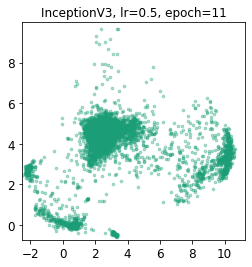

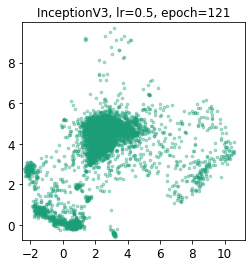

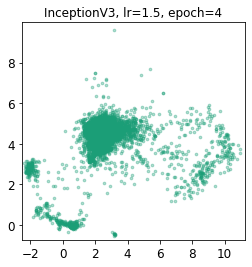

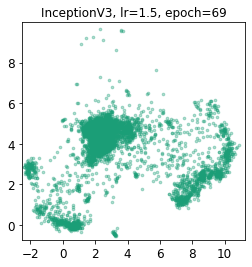

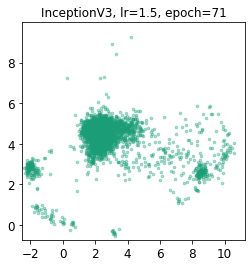

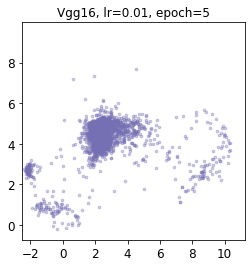

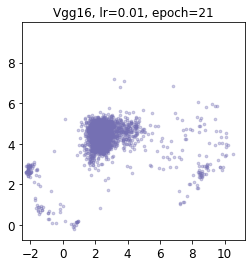

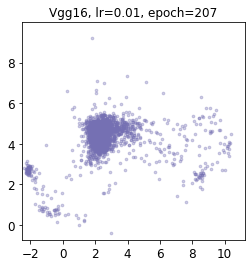

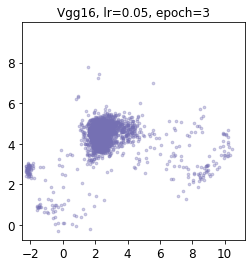

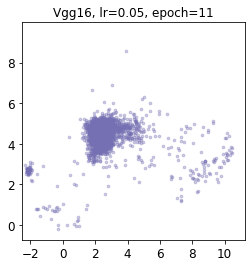

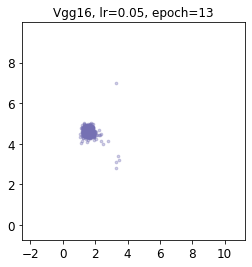

In [81]:
colors = ['#1b9e77', '#fc8d62', '#7570b3']
for model, json_data in zip(models, data):
    Xs = [json_data[neuron][0] for neuron in json_data]
    Ys = [json_data[neuron][1] for neuron in json_data]
    
    if 'pretrained' in model:
        title = 'Vgg16-pretrained' if 'vgg16' in model else 'InceptionV3-pretrained'
    else:
        epoch = model.split('_')[-1]
        learning_rate = model.split('_')[-3]
        model_name = 'Vgg16' if 'vgg16' in model else 'InceptionV3'
        title = f'{model_name}, lr={learning_rate}, epoch={epoch}'
    file_name = title.replace(' ', '_').replace(',', '_')
    
    if 'Vgg16' in title:
        color = colors[2]
    else:
        color = colors[0]
    
    
    plt.figure(figsize=(4, 4))
    plt.scatter(Xs, Ys, s=7, alpha=0.35, c=color)
    plt.xlim(X_range)
    plt.ylim(Y_range)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title)
    plt.savefig(f'../../data/fig/{file_name}.svg')
    plt.show()